In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

In [28]:
import time
import datetime

import pandas as pd
def ends(df, x=5):
    return df.head(x).append(df.tail(x))
setattr(pd.DataFrame,'ends',ends)
setattr(pd.Series,'ends',ends)

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import itertools
import collections
from IPython.display import display
from operator import itemgetter

plt.style.use('seaborn-white')
plt.rc('font', family='serif', serif='Helvetica')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=16, linewidth=0.5)


#from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, PolynomialFeatures
#from sklearn.decomposition import PCA, NMF
from sklearn.pipeline import Pipeline
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split

from numpy.random import choice
#from random import shuffle


In [3]:
import re # regular expressions
import string

from collections import Counter

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer


from nltk import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

from nltk.stem import SnowballStemmer 
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import EnglishStemmer

from nltk.corpus import treebank
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import pos_tag

#import nltk.corpus.stopwords.words as nltkwords
sr = stopwords.words('english')


# Setting up my functions and paths

In [25]:
# My functions
from hopkinsandking import *

path_folder = os.getcwd() + "/"

# My Paths
path_fig = path_folder + 'figures/'
path_data = path_folder + 'data/'
path_outputdata = path_folder + 'outputdata/'
path_inputdata = path_folder + 'inputdata/'

# format of figures
figformat = "pdf"
save2file = False

# Reading file

In [5]:
###### LOADING THE DATA #######
filename = "df4.csv"
fnpath = path_folder + filename
longdf = pd.read_csv(fnpath, sep='\t')
print(longdf.shape)


(10000, 12)


In [6]:
longdf = longdf.loc[~(pd.isna(longdf.text))]
longdf.shape

(9997, 12)

In [7]:
# fill-in missing category values
longdf.loc[(longdf['cpc_1_text'].isna()),'cpc_1_text'] = 'missing'

longdf.groupby('cpc_1_text').count()

,publication_number,country_code,publication_date,uspc,cpc,ipc,title,abstract,text,cpc_1,year
cpc_1_text,,,,,,,,,,,
CHEMISTRY;Metallurgy,618,618,618,618,618,618,618,618,618,618,618
ELECTRICITY,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171
FIXED CONSTRUCTIONS,320,320,320,320,320,320,320,320,320,320,320
GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,365,365,365,365,365,365,365,365,365,365,365
HUMAN NECESSITIES,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234
"MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPONS,BLASTING",719,719,719,719,719,719,719,719,719,719,719
"PERFORMING OPERATIONS, TRANSPORTING",1438,1438,1438,1438,1438,1438,1438,1438,1438,1438,1438
PHYSICS,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302
TEXTILES;PAPER,184,184,184,184,184,184,184,184,184,184,184


In [8]:
longdf.ends(2)

,publication_number,country_code,publication_date,uspc,cpc,ipc,title,abstract,text,cpc_1,cpc_1_text,year
0,US-725177-A,US,19030414,84/320.,G10D3/163,[],Attachment for mandolins or similar instruments.,[],"PATENTED APR. 14, 1903. \n J. M. TIMMONS. \n...",G,PHYSICS,1903
1,US-725485-A,US,19030414,191/60.1,B60L5/06,[],Trolley-wheel.,[],"PATENTBD- APR. 14, 1903. \n No. 725,485.v \n...",B,"PERFORMING OPERATIONS, TRANSPORTING",1903
9998,US-D827899-S,US,20180904,D26/67.,[],[],Electronic torch,[],FIG. 1 is a isometric view of an electronic t...,NaN,missing,2018
9999,US-D828467-S,US,20180911,D21/662.,[],[],Exercise strap,[],FIG. 1 is a front perspective view of an exer...,NaN,missing,2018


# Dividing into train/test

In [9]:
X, X_validation = train_test_split(longdf, test_size=0.33, random_state=42)

In [10]:
y = X["cpc_1_text"].values
y_validation = X_validation["cpc_1_text"].values

# Fit function

In [11]:
# Create the cleaning function and clean text
ct = CleanText()
text_cleaned = ct.fit_transform(X.text)

# Create word count dataframe
word_count_df = create_wordCount(text_cleaned)

In [12]:
(text_cleaned.shape, word_count_df.shape)

((6697,), (162645, 2))

In [13]:
word_count_df.ends(2)

,word,frequency
0,fig,5490
1,view,5006
162643,insort,1
162644,porticn,1


In [14]:
# Get a small word representation of each document
kwords = 20
selectedkwords_vec = sample_kwords(word_count_df, kwords=kwords, min_freq=10, sample_with_weights=True, random_seed=12345)

In [15]:
# Represent each observation as a vector of presence/absence of the works in the small sample
words2analyze = getWords2Analyze(pd.Series(text_cleaned), selectedkwords_vec)

In [16]:
# Create matrix of counts by word combination and label
Xmat_df = create_Xmat(words2analyze, y)
Xmat_df.ends(2)

,allow,capac,citi,control,declar,dicyclohexylamin,downward,grand,januari,logo,...,readili,sept,side,take,time,visibl,worn,wordcombination,category,count
0,1,1,0,1,0,0,0,1,0,0,...,1,0,1,1,1,0,0,11010001000001011100,CHEMISTRY;Metallurgy,1.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,10000000000010010101,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,1.0
6695,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,0,0,10000010000000011100,TEXTILES;PAPER,1.0
6696,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,11010010000000010100,"MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPO...",1.0


In [21]:
# Create P(W|C)
PWgC = create_Pmat(Xmat_df, ['wordcombination', 'category','count'])
print(PWgC.shape)
PWgC.ends(2)

(1107, 10)


category,CHEMISTRY;Metallurgy,ELECTRICITY,FIXED CONSTRUCTIONS,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,HUMAN NECESSITIES,"MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPONS,BLASTING","PERFORMING OPERATIONS, TRANSPORTING",PHYSICS,TEXTILES;PAPER,missing
wordcombination,,,,,,,,,,
00000000000000000000,0.139151,0.115433,0.027027,0.179592,0.04878,0.104575,0.072464,0.084071,0.094017,0.184165
00000000000000000010,0.000000,0.001255,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001721
11110010100001010110,0.002358,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
11111000000000001110,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.001106,0.000000,0.000000


# Predict function

In [ ]:
# Clean the test text
ct = CleanText()
text_cleaned_test = ct.fit_transform(X_validation.text)

# Represent each observation in the test text as a vector of presence/absence of the works in the small sample
words2analyze_test = getWords2Analyze(pd.Series(text_cleaned_test), selectedkwords_vec) 

In [26]:
# Create the number of documents in destination category (i.e., documents per word-combination)
N_per_W = create_Pw(words2analyze_test) 

In [30]:
print(N_per_W.shape)
N_per_W.ends(2)

(694,)


wordcombination
00000000000000000000    434.0
00000000000000000001      1.0
11110000101001011110      1.0
11111000000000011110      1.0
Name: count, dtype: float64

In [56]:
# Check whether all wordcombinations in test set are in the training set
missing_in_train = np.array(list(set(N_per_W.index).difference(set(PWgC.index))))
if len(missing_in_train)>0: 
    print("There are {} word combinations in test missing in training set.".format(len(missing_in_train)))
    print("That is, {0:.0f} documents in test.".format(np.sum(N_per_W.loc[missing_in_train])))
    print("These represent a fraction of {number:.{digits}f} documents in test.".format(number=np.sum(N_per_W.loc[missing_in_train])/N_per_W.sum(),
                                                                                       digits = 2))

There are 276 word combinations in test missing in training set.
That is, 304 documents in test.
These represent a fraction of 0.09 documents in test.


In [47]:
# Expand so that train and test have the same word combinations
missing_PWgC = pd.DataFrame(np.zeros((len(missing_in_train), PWgC.shape[1])),
                               index = list(missing_in_train), columns = PWgC.columns)
final_PWgC = pd.concat((PWgC, missing_PWgC))
final_N_per_W = N_per_W.reindex(final_PWgC.index, fill_value=0.0)

print(final_PWgC.shape, final_N_per_W.shape)
display(final_PWgC.ends(2))
display(final_N_per_W.ends(2))


(1383, 10) (1383,)


category,CHEMISTRY;Metallurgy,ELECTRICITY,FIXED CONSTRUCTIONS,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,HUMAN NECESSITIES,"MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPONS,BLASTING","PERFORMING OPERATIONS, TRANSPORTING",PHYSICS,TEXTILES;PAPER,missing
00000000000000000000,0.139151,0.115433,0.027027,0.179592,0.04878,0.104575,0.072464,0.084071,0.094017,0.184165
00000000000000000010,0.000000,0.001255,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001721
00010000100011111100,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
00010000000011010010,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


00000000000000000000    434.0
00000000000000000010      3.0
00010000100011111100      1.0
00010000000011010010      3.0
Name: count, dtype: float64

In [20]:
# Create the transformation matrix Q
Qmat = getQmat(final_PWgC)
Qmat.shape

(10, 1107)

# Some visualizations

In [18]:
from sklearn import manifold
from matplotlib import offsetbox

In [19]:
y_colors = [float(hash(category) % 256) / 256 for category in y]    

In [20]:
(y_colors[9], y_colors[6689])

(0.5546875, 0.5546875)

In [21]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, y, y_colors, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize = (10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.plot([X[i, 0]], [X[i, 1]], marker='o', markersize=3, color=plt.cm.Set1(y_colors[i]))
        
        if(i % 100 == 0):            
            plt.text(X[i, 0], X[i, 1], str(y[i]),
                     color=plt.cm.Set1(y_colors[i]),
                     fontdict={'weight': 'bold', 'size': 9})

    #if hasattr(offsetbox, 'AnnotationBbox'):
    #    # only print thumbnails with matplotlib > 1.0
    #    shown_images = np.array([[1., 1.]])  # just something big
    #    for i in range(X.shape[0]):
    #        dist = np.sum((X[i] - shown_images) ** 2, 1)
    #        if np.min(dist) < 4e-1:
    #            # don't show points that are too close
    #            continue
    #        shown_images = np.r_[shown_images, [X[i]]]
    #        imagebox = offsetbox.AnnotationBbox(
    #            offsetbox.OffsetImage(y[i], cmap=plt.cm.gray_r),
    #            X[i])
    #        ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


Computing t-SNE embedding


C:\Users\agomez\AppData\Local\Continuum\Anaconda3\envs\machinelearning\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\agomez\AppData\Local\Continuum\Anaconda3\envs\machinelearning\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


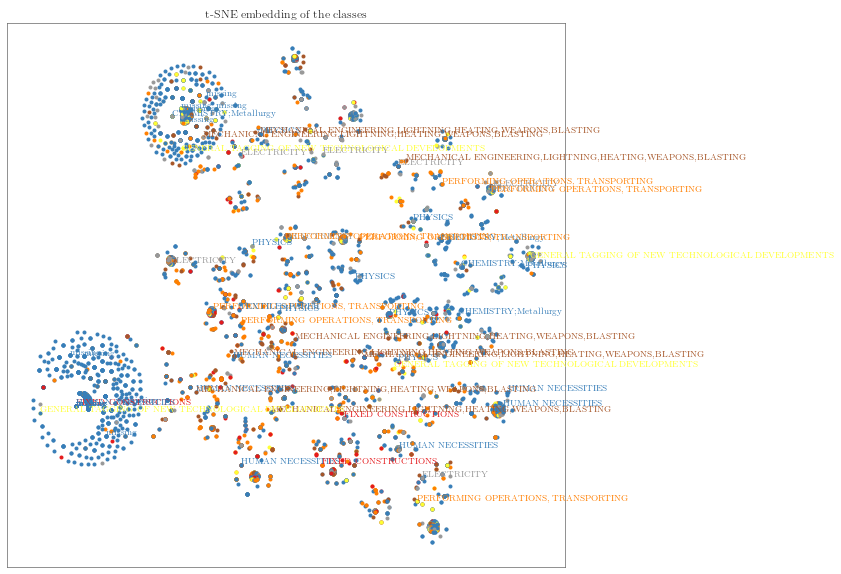

In [22]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity = 50)
t0 = time.time()
X_tsne = tsne.fit_transform(Xmat_df.iloc[:,:kwords].values)

plot_embedding(X_tsne, y, y_colors,
               "t-SNE embedding of the classes")

plt.show()

# Just one simple try

## choosing sample of words

In [104]:
numwordsconsidered = 20 # not that it has to be less than np.log2(longdf.shape[0])

np.random.seed(12321)
wordsconsidered = choice(words2keep.word.values, 
                         size=numwordsconsidered, 
                         #p = words2keep.frequency.values/sum(words2keep.frequency.values), 
                         replace=False)
wordsconsidered

array(['bicarbon', 'cmo', 'ra', 'simpli', 'triazol', 'gs', 'wherebi',
       'weekli', 'sheet', 'stand', 'minim', 'vortex', 'pole', 'regener',
       'straddl', 'medium', 'random', 'eman', 'liabl', 'urethan'],
      dtype=object)

## Creation of matrix of P(S=s | D=j)

In [107]:
vectext = longdf_train['words2analyze'].apply(lambda x: " ".join(list(set(x.split()).intersection(set(wordsconsidered)))))

In [108]:
len(vectext.shape)

1

In [109]:
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(vectext)
#print(vectorizer.get_feature_names())


In [27]:
Xdf = create_Xmat(vectext, y)

NameError: name 'vectext' is not defined

In [111]:
Xdf['count'] = 1.0

In [112]:
Xdf.ends(3)

,bicarbon,cmo,eman,gs,liabl,medium,minim,pole,ra,random,...,stand,straddl,triazol,urethan,vortex,weekli,wherebi,wordcombination,category,count
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,00000110000110000001,CHEMISTRY;Metallurgy,1.0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,00000010000000000000,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,00000000000000000000,missing,1.0
6694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,00000000000000000000,PHYSICS,1.0
6695,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,00000000000101000001,TEXTILES;PAPER,1.0
6696,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,00000000000001000001,"MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPO...",1.0


In [114]:
Fsd.ends(5)

,wordcombination,category,count,tot_by_category,P_s_given_D
0,00000000000000000000,CHEMISTRY;Metallurgy,116.0,424.0,0.273585
1,00000000000000000000,ELECTRICITY,250.0,797.0,0.313676
2,00000000000000000000,FIXED CONSTRUCTIONS,72.0,222.0,0.324324
3,00000000000000000000,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,83.0,245.0,0.338776
4,00000000000000000000,HUMAN NECESSITIES,220.0,820.0,0.268293
1084,10000110110000000000,CHEMISTRY;Metallurgy,1.0,424.0,0.002358
1085,10010100100000000001,HUMAN NECESSITIES,1.0,820.0,0.001220
1086,10010100110001000000,CHEMISTRY;Metallurgy,1.0,424.0,0.002358
1087,10010110110000011101,CHEMISTRY;Metallurgy,1.0,424.0,0.002358
1088,10100000000001010000,CHEMISTRY;Metallurgy,1.0,424.0,0.002358


In [115]:
Pmat_SgD.ends(3)

category,CHEMISTRY;Metallurgy,ELECTRICITY,FIXED CONSTRUCTIONS,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,HUMAN NECESSITIES,"MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPONS,BLASTING","PERFORMING OPERATIONS, TRANSPORTING",PHYSICS,TEXTILES;PAPER,missing
wordcombination,,,,,,,,,,
00000000000000000000,0.273585,0.313676,0.324324,0.338776,0.268293,0.357298,0.262940,0.265487,0.256410,0.982788
00000000000000000001,0.035377,0.056462,0.166667,0.040816,0.080488,0.106754,0.111801,0.035398,0.111111,0.000574
00000000000000000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003319,0.000000,0.000000
10010100110001000000,0.002358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10010110110000011101,0.002358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10100000000001010000,0.002358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [151]:
submat_1 = Pmat_SgD.head(10)
submat_2 = pd.DataFrame(np.zeros_like(Pmat_SgD.tail(3)), index=Pmat_SgD.tail(3).index, columns=Pmat_SgD.tail(3).columns)
display(submat_1)
display(submat_2)
final_mat = pd.concat((submat_1, submat_2))
final_mat = final_mat/final_mat.sum(axis=0)
display(final_mat)

category,CHEMISTRY;Metallurgy,ELECTRICITY,FIXED CONSTRUCTIONS,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,HUMAN NECESSITIES,"MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPONS,BLASTING","PERFORMING OPERATIONS, TRANSPORTING",PHYSICS,TEXTILES;PAPER,missing
wordcombination,,,,,,,,,,
00000000000000000000,0.273585,0.313676,0.324324,0.338776,0.268293,0.357298,0.262940,0.265487,0.256410,0.982788
00000000000000000001,0.035377,0.056462,0.166667,0.040816,0.080488,0.106754,0.111801,0.035398,0.111111,0.000574
00000000000000000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003319,0.000000,0.000000
00000000000000000100,0.002358,0.001255,0.000000,0.000000,0.000000,0.002179,0.000000,0.000000,0.000000,0.000000
00000000000000001000,0.004717,0.001255,0.000000,0.000000,0.002439,0.002179,0.003106,0.000000,0.000000,0.000000
00000000000000001001,0.000000,0.001255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00000000000000010000,0.002358,0.000000,0.000000,0.000000,0.000000,0.000000,0.001035,0.000000,0.000000,0.000000
00000000000000100000,0.000000,0.001255,0.000000,0.000000,0.002439,0.006536,0.003106,0.000000,0.000000,0.000000
00000000000000100001,0.000000,0.001255,0.000000,0.000000,0.000000,0.002179,0.003106,0.001106,0.000000,0.000000


category,CHEMISTRY;Metallurgy,ELECTRICITY,FIXED CONSTRUCTIONS,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,HUMAN NECESSITIES,"MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPONS,BLASTING","PERFORMING OPERATIONS, TRANSPORTING",PHYSICS,TEXTILES;PAPER,missing
wordcombination,,,,,,,,,,
10010100110001000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10010110110000011101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10100000000001010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


category,CHEMISTRY;Metallurgy,ELECTRICITY,FIXED CONSTRUCTIONS,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,HUMAN NECESSITIES,"MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPONS,BLASTING","PERFORMING OPERATIONS, TRANSPORTING",PHYSICS,TEXTILES;PAPER,missing
wordcombination,,,,,,,,,,
00000000000000000000,0.816901,0.793651,0.631579,0.83,0.718954,0.716157,0.651282,0.824742,0.681818,0.990173
00000000000000000001,0.105634,0.142857,0.324561,0.10,0.215686,0.213974,0.276923,0.109966,0.295455,0.000578
00000000000000000010,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.010309,0.000000,0.000000
00000000000000000100,0.007042,0.003175,0.000000,0.00,0.000000,0.004367,0.000000,0.000000,0.000000,0.000000
00000000000000001000,0.014085,0.003175,0.000000,0.00,0.006536,0.004367,0.007692,0.000000,0.000000,0.000000
00000000000000001001,0.000000,0.003175,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00000000000000010000,0.007042,0.000000,0.000000,0.00,0.000000,0.000000,0.002564,0.000000,0.000000,0.000000
00000000000000100000,0.000000,0.003175,0.000000,0.00,0.006536,0.013100,0.007692,0.000000,0.000000,0.000000
00000000000000100001,0.000000,0.003175,0.000000,0.00,0.000000,0.004367,0.007692,0.003436,0.000000,0.000000


In [155]:
final_mat.sum(axis=0)

category
CHEMISTRY;Metallurgy                                         1.0
ELECTRICITY                                                  1.0
FIXED CONSTRUCTIONS                                          1.0
GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS            1.0
HUMAN NECESSITIES                                            1.0
MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPONS,BLASTING    1.0
PERFORMING OPERATIONS, TRANSPORTING                          1.0
PHYSICS                                                      1.0
TEXTILES;PAPER                                               1.0
missing                                                      1.0
dtype: float64

Text(55.49999999999999, 0.5, 'wordcombination')

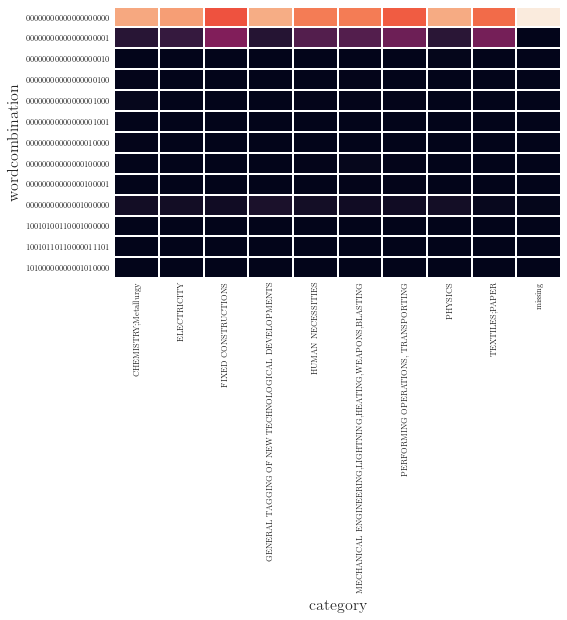

In [157]:
plt.figure(figsize=(8, 5))
ax = sns.heatmap(final_mat, linewidths=1, cbar=False)
#ax.set_xticks([]);

ax.set_xlabel("category")
ax.set_ylabel("wordcombination")

Text(64.5, 0.5, 'category')

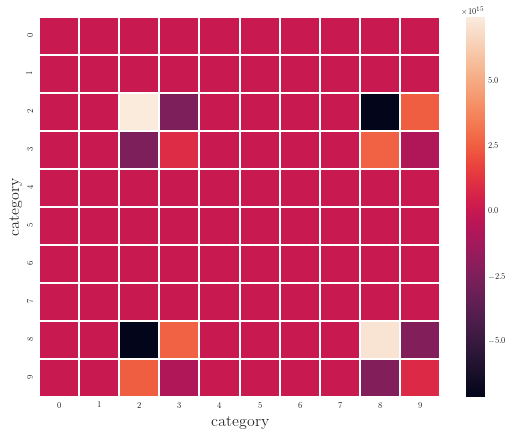

In [152]:
plt.figure(figsize=(9, 7))
ax = sns.heatmap(np.linalg.inv((final_mat.T).dot(final_mat)), linewidths=1, cbar=True)
#ax.set_xticks([]);

ax.set_xlabel("category")
ax.set_ylabel("category")   

In [158]:
getQmat(final_mat).dot(np.array([0,0,0.9, 0,0,0, 0,0,0,0.1,
                                 0.3,0.2,0.4])).sum()

0.9414864260862217

In [119]:
pca = PCA(n_components=5)
pcs = pca.fit_transform(final_mat)
np.cumsum(pca.explained_variance_ratio_)

array([0.97623499, 0.99947367, 0.99991028, 0.99995155, 0.99998031])

In [124]:
recon_mat = pd.DataFrame(pca.inverse_transform(pcs), index = final_mat.index, columns=final_mat.columns)
recon_mat = recon_mat - recon_mat.min().min()
recon_mat = recon_mat/recon_mat.sum(axis=0)
display(recon_mat)

category,CHEMISTRY;Metallurgy,ELECTRICITY,FIXED CONSTRUCTIONS,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS,HUMAN NECESSITIES,"MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPONS,BLASTING","PERFORMING OPERATIONS, TRANSPORTING",PHYSICS,TEXTILES;PAPER,missing
wordcombination,,,,,,,,,,
00000000000000000000,0.800733,0.777990,0.619458,0.813541,0.704923,0.702191,0.638730,0.808404,0.668600,0.970216
00000000000000000001,0.104999,0.141416,0.319151,0.099508,0.212655,0.210967,0.272564,0.109229,0.290678,0.002254
00000000000000000010,0.000489,0.003269,0.002699,0.004373,0.001018,0.001019,0.001207,0.008112,0.002043,0.002542
00000000000000000100,0.007948,0.003480,0.000973,0.001760,0.003315,0.003833,0.004171,0.001944,0.001191,0.002451
00000000000000001000,0.015271,0.005384,0.002484,0.003051,0.007003,0.006740,0.008007,0.000000,0.002058,0.001827
00000000000000001001,0.002440,0.002309,0.001323,0.001093,0.001401,0.002373,0.002486,0.003490,0.001488,0.001564
00000000000000010000,0.008478,0.002665,0.001662,0.001156,0.002465,0.001656,0.003251,0.001653,0.001771,0.001446
00000000000000100000,0.001571,0.005552,0.001547,0.001717,0.007253,0.013986,0.010229,0.001570,0.001537,0.001696
00000000000000100001,0.001514,0.004024,0.002388,0.002201,0.003975,0.007078,0.005765,0.004031,0.002247,0.001772


In [61]:
from sklearn.decomposition import PCA, NMF

In [62]:
pca = PCA(n_components=Pmat_SgD.shape[1])
results = pca.fit_transform(Pmat_SgD)

In [80]:
np.cumsum(pca.explained_variance_ratio_)

array([0.81166823, 0.95230855, 0.96933623, 0.97868032, 0.98445273,
       0.98949806, 0.99300411, 0.9957759 , 0.99796003, 1.        ])

In [83]:
(results[:2,:2],pca.components_[:2])

(array([[0.16055111, 0.2532771 ],
        [0.00034336, 0.00088109]]),
 array([[ 0.03940029,  0.04616126,  0.0081504 ,  0.06900944,  0.02194836,
          0.0364146 ,  0.02656053,  0.0297822 ,  0.01714623,  0.99387818],
        [ 0.37190139,  0.37142337,  0.08609336,  0.63628322,  0.15103894,
          0.34665498,  0.22930583,  0.269111  ,  0.17704619, -0.11016328]]))

In [72]:
reconstruction = results[:,:2]@pca.components_[:2]

In [81]:
(Pmat_SgD.shape, results.shape, reconstruction.shape)

((3122, 10), (3122, 10), (3122, 10))

In [76]:
np.round(reconstruction[:5,:],3)

array([[ 0.101,  0.101,  0.023,  0.172,  0.042,  0.094,  0.062,  0.073,
         0.048,  0.132],
       [ 0.   ,  0.   ,  0.   ,  0.001,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [-0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
        -0.   , -0.   ],
       [ 0.002,  0.002,  0.   ,  0.003,  0.001,  0.002,  0.001,  0.001,
         0.001,  0.035],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   , -0.   ]])

In [78]:
(Pmat_SgD.sum(axis=0), reconstruction.sum(axis=0))

(category
 CHEMISTRY;Metallurgy                                         1.0
 ELECTRICITY                                                  1.0
 FIXED CONSTRUCTIONS                                          1.0
 GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS            1.0
 HUMAN NECESSITIES                                            1.0
 MECHANICAL ENGINEERING,LIGHTNING,HEATING,WEAPONS,BLASTING    1.0
 PERFORMING OPERATIONS, TRANSPORTING                          1.0
 PHYSICS                                                      1.0
 TEXTILES;PAPER                                               1.0
 missing                                                      1.0
 dtype: float64,
 array([ 6.03396456e-15, -6.08291629e-16, -1.83386021e-16,  1.58374832e-15,
        -1.31206081e-15, -1.30985175e-15,  3.24791734e-15,  2.28755816e-15,
        -1.18907163e-15, -4.59772194e-15]))

## Computing the proportion of patents per category on the test set

### I need to compute the vector of shares per patent's wordcombination

In [84]:
vectext_test = longdf_test['words2analyze'].apply(lambda x: " ".join(list(set(x.split()).intersection(set(wordsconsidered)))))

Xdf_test = create_Xmat(vectext_test)
Xdf_test['category'] = longdf_test['cpc_1_text'].values

Xdf_test['count'] = 1.0

In [85]:
Xdf_test.ends()

,aceton,actuat,appli,combin,contact,design,detail,forego,hook,inclus,...,replac,scienc,state,store,thereof,thereon,water,wordcombination,category,count
0,0,0,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,00111110000100010000,PHYSICS,1.0
1,1,0,0,1,1,0,0,0,0,0,...,0,0,1,1,1,0,1,10011000000100011101,HUMAN NECESSITIES,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,00000000000000000000,HUMAN NECESSITIES,1.0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,00000100000000010000,TEXTILES;PAPER,1.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,00000100000000000100,missing,1.0
3295,0,0,1,0,0,1,1,1,0,0,...,1,0,0,1,1,0,1,00100111000101001101,ELECTRICITY,1.0
3296,0,0,0,1,0,0,1,1,0,0,...,0,0,1,1,1,0,0,00010011000000011100,PHYSICS,1.0
3297,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0,1,0,0,00100011000100010100,ELECTRICITY,1.0
3298,0,0,0,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,00000110000001010000,"PERFORMING OPERATIONS, TRANSPORTING",1.0
3299,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,00000100000000000100,missing,1.0


In [86]:
Ps = Xdf_test.groupby(by = ['wordcombination'])['count'].sum()

In [87]:
Ps.head()

wordcombination
00000000000000000000    337.0
00000000000000000001      2.0
00000000000000000100     41.0
00000000000000001000      1.0
00000000000000001101      1.0
Name: count, dtype: float64

In [88]:
missing_intest = set(Pmat_SgD.index).difference(set(Ps.index))
missing_Ps = pd.Series(np.zeros((len(missing_intest))),
                               index = list(missing_intest))

In [ ]:
final_Ps_test = pd.concat((Ps, missing_Ps))

## missing wordcombinations in our train dataset

In [ ]:
missingwordcombinations = set(Ps.index).difference(set(Pmat_SgD.index))

missing_Pmat_SgD = pd.DataFrame(np.zeros((len(missingwordcombinations), Pmat_SgD.shape[1])),
                               index = list(missingwordcombinations), columns = Pmat_SgD.columns)

In [ ]:
missing_Pmat_SgD.ends(2)

## merging 

In [ ]:
final_Pmat_SgD = pd.concat((Pmat_SgD, missing_Pmat_SgD))

In [ ]:
final_Pmat_SgD = final_Pmat_SgD.loc[final_Ps_test.index.values]

In [ ]:
final_Pmat_SgD.ends(2)

In [ ]:
pd.concat((final_Ps_test.head(2), final_Ps_test.tail(2)))

In [ ]:
(final_Pmat_SgD.shape, final_Ps_test.shape, Pmat_SgD.shape, missing_Pmat_SgD.shape)

# Predicting shares in test dataset

In [ ]:
# p(s) = P(S|D).P(D) ==> y = X*B  ==> Bhat = (Xt*X)^(-1)*Xt*y

In [ ]:
trueD = Xdf_test.groupby(by = ['category'])['count'].sum()

In [ ]:
predD = (np.linalg.inv((final_Pmat_SgD.T).dot(final_Pmat_SgD))).dot(final_Pmat_SgD.T).dot(final_Ps_test)


In [ ]:
fig = plt.figure(figsize = (8, 5))
plt.scatter(trueD, predD)
plt.plot(trueD.sort_values(), trueD.sort_values(), '-.')
plt.xlabel('True number of patents per category')
plt.ylabel('Predicted number of patents per category')
plt.show()

In [ ]:
pred_df = pd.DataFrame(np.array([trueD, predD]).T,
                      index = trueD.index.values,
                      columns = ['trueD', 'predD'])
print(("True total {}".format(trueD.sum()), "Predicted total {}".format(predD.sum())))
pred_df

In [ ]:
Out[21]

In [ ]:
Out[21]

In [ ]:
Out[66]

In [ ]:
gdfunc = GridSearch(('alpha': {0, 0.1, 10, 100},
                    'n_iter': {0, 1, 2},
                    'n_words'),
                   KingsFunc,
                   Xtrain, ytrain, Xtest, ytest)

# Regularization of matrix $P(S|D)$

In matrix format, we have the following equation:
$$
\mathbf{w} = \mathbf{P} \mathbf{c},
$$
where $\mathbf{w}$ is the vector of the number of documents for each word combination, $\mathbf{P}$ is the matrix of probabilities $P(w|c)$ that we observe a certain word combination $w$ _given_ we have a document of category $c$, and $\mathbf{c}$ is the vector of number of documents per category.

The minimization problem we have, in principle, is
$$
\mathrm{argmax}_{c}\left\| \mathbf{P} \mathbf{c} - \mathbf{w} \right\|^2_F.
$$

Hopkings and King's (2010) solution is to count the number of documents per category in a test set $\mathbf{c_{\mathrm{test}}}$ for which we can only have the number of documents across different word combinations $\mathbf{w_{\mathrm{test}}}$, is to construct the matrix $\mathbf{P_{\mathrm{train}}}$ from a training sample in which we do observe the categories, and simply apply a standard regression matrix algebra:
$$
\mathbf{\widehat{c}_{\mathrm{test}}} = \left(\mathbf{P_{\mathrm{train}}}^T\mathbf{P_{\mathrm{train}}}\right)^{-1}\mathbf{P_{\mathrm{train}}}^T\mathbf{w_{\mathrm{test}}}
$$

**However**, in the test data set, it is very likely that we will observe word combinations $w$ that won't be observed in the training set. Hence, the row $P(w|c)$ across all $c\in D$ will be a row of zeros.

Hence, we have a problem of **missing data** in a matrix. That is, we really have something like
$$
\mathbf{P_{\mathrm{train}}} = \left(
\begin{array}{c}
    \mathbf{P_{\mathrm{observed}}} \\
    \mathbf{P_{\mathrm{unobserved}}}
\end{array}
\right) = 
\left(
\begin{array}{c}
    \mathbf{P_{\mathrm{observed}}} \\
    \mathbf{O}
\end{array}
\right)
$$

One way to solve this is by **regularizing the matrix** $\mathbf{P_{\mathrm{train}}}$.

If we assume that the matrix is low rank, we can find an estimate
$$
\widehat{\mathbf{P}} = \mathbf{H}\mathbf{V}^T,
$$ 
where matrices $\mathbf{H}$ and $\mathbf{V}$ are dimensionality reduction matrices, which can be chosen depending on the assumptions.